In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
#looking at first 5 rows of df
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [4]:
#looking at bottom 5 rows of df
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


## Q5: How many rows and columns are in gdp_df? What are the data types of each column?

In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


## answer: 
7662 rows, 4 columns: 
country/area - object; 
year - integer; 
value - float; 
value footnotes - float

## Q6: Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
#df.drop("age", axis='columns') -- documentation for dropping a column
# can also do df.drop(columns = 'column_name')
gdp_df = gdp_df.drop('Value Footnotes', axis = 'columns')
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [7]:
#renaming remaining columns

gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Year':'Year', 'Value': 'GDP_Per_Capita'})
#don't have to list "year" column if not changing it

In [8]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


## answer: see above

## Q7: How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [99]:
#unique values for year column
gdp_df['Year'].nunique()
# 33 years total

33

In [101]:
#unique values for year column
gdp_df['Year'].unique().tolist()
# 33 years total, listed below

[2021,
 2020,
 2019,
 2018,
 2017,
 2016,
 2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2008,
 2007,
 2006,
 2005,
 2004,
 2003,
 2002,
 2022,
 2001,
 2000,
 1999,
 1998,
 1997,
 1996,
 1995,
 1994,
 1993,
 1992,
 1991,
 1990]

In [102]:
gdp_df['Country'].value_counts().reset_index()
# 242 countries total

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [11]:
grouped = gdp_df.groupby('Country')['Year'].count()
grouped

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
                               ..
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33
Name: Year, Length: 242, dtype: int64

In [12]:
#grouped = df.groupby('mygroups').sum().reset_index()
#grouped.sort_values('mygroups', ascending=False)

group_new = gdp_df.groupby('Country')['Year'].count().reset_index()
group_new.sort_values('Year', ascending=False)

,Country,Year
121,Least developed countries: UN classification,33
143,Middle East & North Africa,33
145,Middle East & North Africa (excluding high inc...,33
146,Middle income,33
148,Mongolia,33
...,...,...
112,Kosovo,15
192,Sint Maarten (Dutch part),14
225,Turks and Caicos Islands,12
197,Somalia,10


In [107]:
group_new[group_new['Year'] < 33].sort_values('Year', ascending = False)
# list of countries missing data

,Country,Year
122,Lebanon,32
22,Bhutan,32
221,Tonga,32
91,Hungary,32
10,Aruba,32
224,Turkmenistan,31
193,Slovak Republic,31
113,Kuwait,31
32,Cambodia,30
238,West Bank and Gaza,29


## answer 7b above - list of countries missing data

In [14]:
group_new[group_new['Year'] < 33].count()
# of countries missing data = 40
# from line 25 above, there are 242 countries total
# 242 - 40 = 202 countries with all years of data

Country    40
Year       40
dtype: int64

## answer 7a: 202 countries have data for all years

In [15]:
gdp_df['Year'].value_counts()

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

## Q7c answer: all countries have data for 2013 - 2020, then all countries except 1 have data for 2021, then missing data for 10 countries in 2022

## Q8: In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [16]:
# creating variable for 2020 data
gdp_2020 = gdp_df[gdp_df["Year"] == 2020]

In [17]:
gdp_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


(array([111.,  60.,  24.,  19.,  15.,   5.,   4.,   1.,   2.,   1.]),
 array([   711.35526342,  11815.35121222,  22919.34716101,  34023.3431098 ,
         45127.3390586 ,  56231.33500739,  67335.33095619,  78439.32690498,
         89543.32285377, 100647.31880257, 111751.31475136]),
 <BarContainer object of 10 artists>)

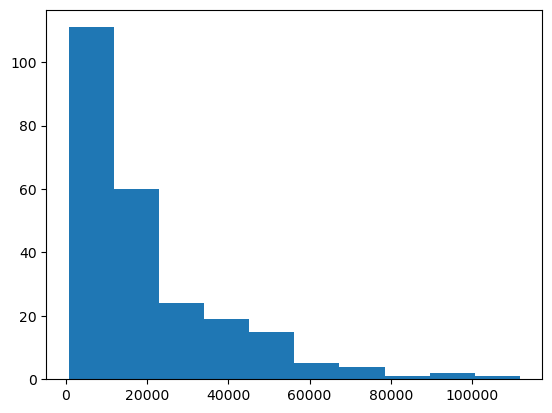

In [18]:
# histogram in matplotlib
plt.hist(gdp_2020.GDP_Per_Capita)

## histograms above and below

<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

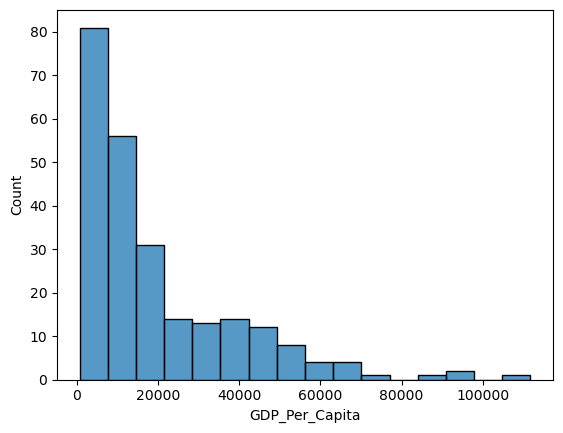

In [19]:
# histogram with Seaborn
sns.histplot(data=gdp_2020, x="GDP_Per_Capita")

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

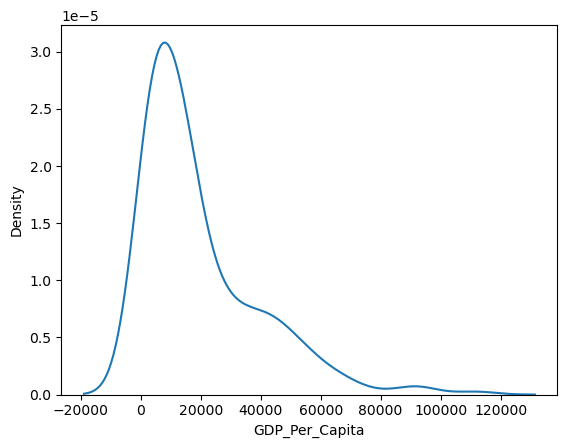

In [20]:
# Density plot
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

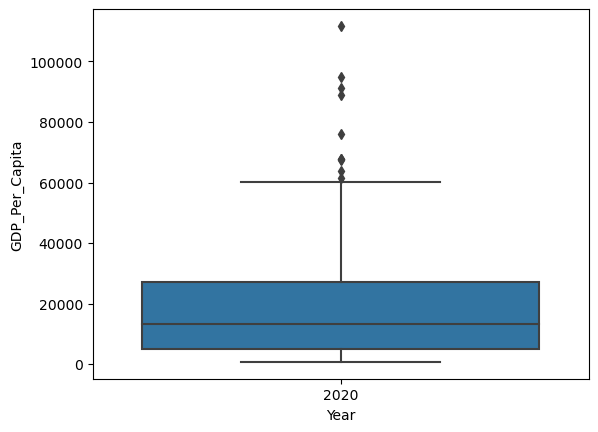

In [21]:
#boxplot
sns.boxplot( x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

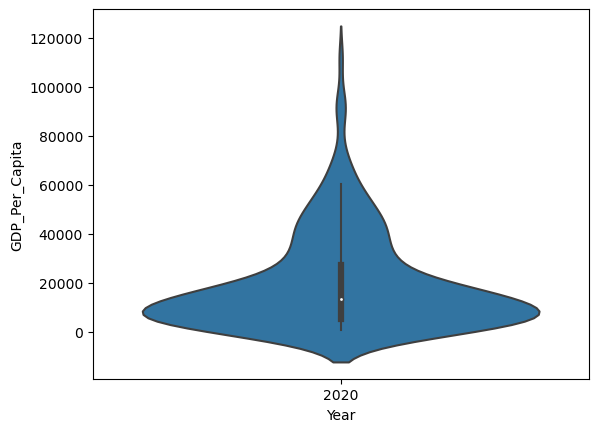

In [22]:
#violin plot
sns.violinplot(x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"] )

### Q8 observations: histogram probably the most useful - you can see how many countries have a GDP within a certain range; boxplot and violin plot - you can see the range of values

## Q9: What was the median GDP per capita value in 2020?

In [23]:
gdp_2020.describe()

,Year,GDP_Per_Capita
count,242.0,242.000000
mean,2020.0,19586.754446
std,0.0,19640.401631
min,2020.0,711.355263
25%,2020.0,4961.408532
50%,2020.0,13357.997573
75%,2020.0,27064.125293
max,2020.0,111751.314751


In [24]:
#median
gdp_2020['GDP_Per_Capita'].median()

13357.997573370474

## Q9 answer: 13357.997573370474

## Q10: For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

A boxplot;
A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn);
A scatterplot;
A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn);
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [25]:
decades = (1990, 2000, 2010, 2020)
gdp_decades = gdp_df[gdp_df["Year"].isin(decades)]

In [108]:
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

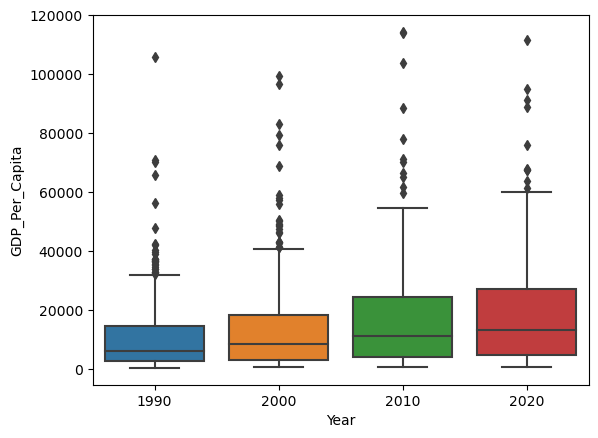

In [27]:
#boxplot
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )
# strength - seeing outliers

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

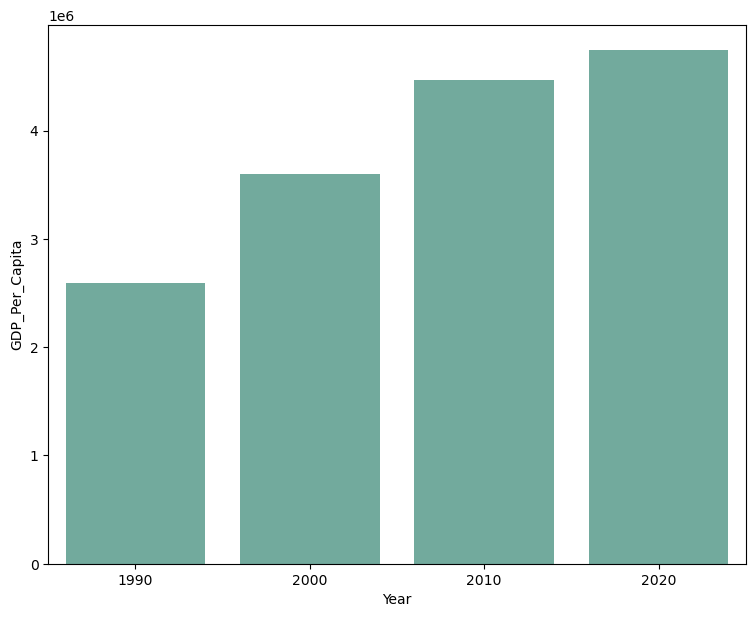

In [28]:
#barplot
plt.figure(figsize=(9, 7))

# plot a bar chart
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_decades, 
    estimator=sum, 
    errorbar=None, 
    color='#69b3a2')
# strength: minimalist, simple; weakness: label is unclear? 

Text(0, 0.5, 'GDP per Capita')

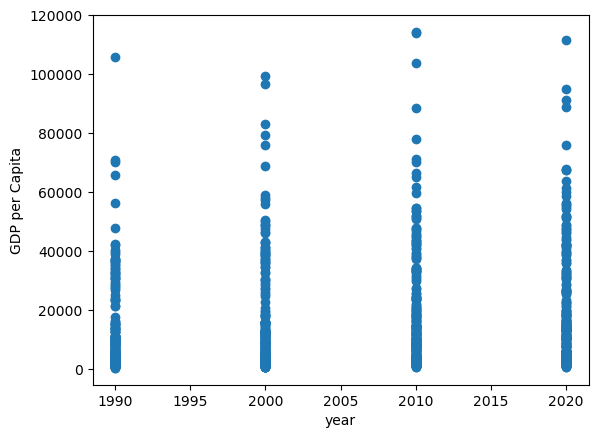

In [29]:
#scatterplot
plt.scatter(gdp_decades.Year, gdp_decades.GDP_Per_Capita )
plt.xlabel('year')
plt.ylabel('GDP per Capita')
#strength: see some distribution of values and how common certain values are; weakness: values tend to run together at bottom, not able to clearly see if values are increasing over time 

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

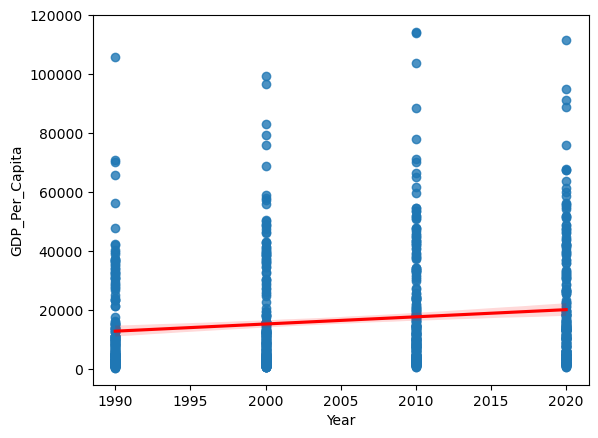

In [30]:
#scatterplot with a trend line overlaid
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "r"}
)
#strength: trendline able to show increase over time, which isn't as clear from the original scatterplot

### Q10 observation: GDP values are gradually rising over time. 

## Q11: Which country was the first to have a GDP per capita greater than $100,000?

In [31]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [32]:
gdp_df.sort_values(['Year', 'GDP_Per_Capita'], ascending = [True, False])

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
4178,Luxembourg,1990,70860.819124
904,Brunei,1990,70358.724094
711,Bermuda,1990,65961.406278
6775,Switzerland,1990,56232.026080
...,...,...,...
4822,Mozambique,2022,1243.073638
6271,Somalia,2022,1155.275773
1628,Dem. Rep. Congo,2022,1132.654233
1215,Central African Republic,2022,819.192343


## Q11 answer: United Arab Emirates in 1990

## Q12: Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [33]:
gdp_2020.sort_values('GDP_Per_Capita', ascending = False)
#could also do gdp_2020.nlargest(1, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


## Q12 answer: Luxembourg

In [34]:
gdp_lux = gdp_df[gdp_df['Country'] == 'Luxembourg']

In [35]:
gdp_lux = gdp_lux.sort_values('Year')

In [36]:
gdp_lux.head()

,Country,Year,GDP_Per_Capita
4178,Luxembourg,1990,70860.819124
4177,Luxembourg,1991,75961.668717
4176,Luxembourg,1992,76323.304753
4175,Luxembourg,1993,78468.921760
4174,Luxembourg,1994,80365.224508


Text(0.5, 1.0, 'Luxembourg GDP over time')

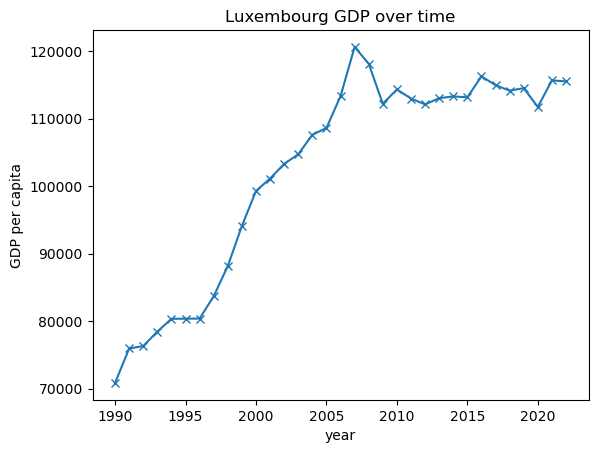

In [37]:
# line plot
plt.plot(gdp_lux.Year, gdp_lux.GDP_Per_Capita, marker = 'x')
plt.xlabel('year')
plt.ylabel('GDP per capita')
plt.title('Luxembourg GDP over time')


## Q13: Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that countries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [38]:
gdp_2020.sort_values('GDP_Per_Capita', ascending = True)

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556
...,...,...,...
681,Bermuda,2020,76117.804744
5746,Qatar,2020,89019.069857
3279,Ireland,2020,91356.855054
6108,Singapore,2020,94910.101431


## Q13 answer: Burundi

In [39]:
gdp_bur = gdp_df[gdp_df['Country'] == 'Burundi']

In [40]:
gdp_bur = gdp_bur.sort_values('Year')
gdp_bur

,Country,Year,GDP_Per_Capita
1003,Burundi,1990,1175.155086
1002,Burundi,1991,1209.388158
1001,Burundi,1992,1190.067435
1000,Burundi,1993,1153.541309
999,Burundi,1994,1103.167298
998,Burundi,1995,956.490976
997,Burundi,1996,880.309412
996,Burundi,1997,867.284265
995,Burundi,1998,891.699844
994,Burundi,1999,862.006680


Text(0.5, 1.0, 'Burundi GDP over time')

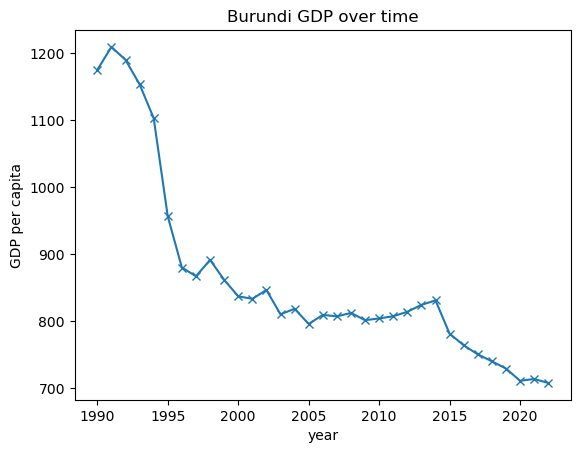

In [41]:
# line plot
plt.plot(gdp_bur.Year, gdp_bur.GDP_Per_Capita, marker = 'x')
plt.xlabel('year')
plt.ylabel('GDP per capita')
plt.title('Burundi GDP over time')

### Bonus: 

In [42]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [43]:
gdp_2020.describe()

,Year,GDP_Per_Capita
count,242.0,242.000000
mean,2020.0,19586.754446
std,0.0,19640.401631
min,2020.0,711.355263
25%,2020.0,4961.408532
50%,2020.0,13357.997573
75%,2020.0,27064.125293
max,2020.0,111751.314751


In [44]:
#creating dataset for 1990 data
gdp_1990 = gdp_df[gdp_df["Year"] == 1990]
gdp_1990.describe()

,Year,GDP_Per_Capita
count,207.0,207.000000
mean,1990.0,12506.088374
std,0.0,15167.399935
min,1990.0,460.123697
25%,1990.0,2915.057031
50%,1990.0,6223.452994
75%,1990.0,14584.911473
max,1990.0,105893.626059


## Q13 Bonus answer part 1: Is it true in general that countries had a higher GDP per capita in 2020 than in 1990? Yes, based on mean and median above, GDP per capita higher in 2020.

In [78]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [92]:
#bonus part 2: find countries where GDP In 2020 is less than GDP in 1990

#renaming GDP column for 1990 before merge
gdp_1990_new = gdp_1990.rename(columns = {'GDP_Per_Capita' : 'GDP_1990'})
gdp_1990_new

,Country,Year,GDP_1990
52,Africa Eastern and Southern,1990,3037.297466
85,Africa Western and Central,1990,2788.301039
118,Albania,1990,4827.027705
151,Algeria,1990,8828.874473
184,Angola,1990,5793.084512
...,...,...,...
7500,Vanuatu,1990,2774.138350
7533,Viet Nam,1990,2099.394649
7595,World,1990,9705.981267
7628,Zambia,1990,2290.039226


In [93]:
#renaming GDP column for 2020 before merge
gdp_2020_new = gdp_2020.rename(columns = {'GDP_Per_Capita' : 'GDP_2020'})
gdp_2020_new

,Country,Year,GDP_2020
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [95]:
#merging 1990 and 2020 data  
merged_gdp = gdp_1990_new.merge(gdp_2020_new, how='outer', on=('Country'))
merged_gdp

,Country,Year_x,GDP_1990,Year_y,GDP_2020
0,Africa Eastern and Southern,1990.0,3037.297466,2020,3455.023119
1,Africa Western and Central,1990.0,2788.301039,2020,3957.933804
2,Albania,1990.0,4827.027705,2020,13278.369769
3,Algeria,1990.0,8828.874473,2020,10844.770764
4,Angola,1990.0,5793.084512,2020,6029.691895
...,...,...,...,...,...
237,Small states,NaN,NaN,2020,19026.366476
238,Somalia,NaN,NaN,2020,1127.418534
239,Timor-Leste,NaN,NaN,2020,4856.518291
240,Turks and Caicos Islands,NaN,NaN,2020,18474.865995


In [98]:
#countries where GDP higher in 1990 than in 2020
merged_gdp[merged_gdp['GDP_1990'] > merged_gdp['GDP_2020']]

,Country,Year_x,GDP_1990,Year_y,GDP_2020
15,Barbados,1990.0,14097.395550,2020,13805.777541
25,Brunei,1990.0,70358.724094,2020,61603.550804
28,Burundi,1990.0,1175.155086,2020,711.355263
34,Central African Republic,1990.0,1200.613390,2020,847.765012
41,Congo,1990.0,5007.319245,2020,3384.654335
45,Dem. Rep. Congo,1990.0,1750.169739,2020,1044.071214
66,Fragile and conflict affected situations,1990.0,4864.814075,2020,4357.621312
68,Gabon,1990.0,17559.006114,2020,13903.288955
76,Guinea-Bissau,1990.0,1998.173206,2020,1803.630591
78,Haiti,1990.0,3612.815105,2020,2970.462845


## Q13 bonus part 2: see above - 19 countries

## Q14: Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [45]:
#read in CSV, remove footnotes at end, starting at row 4495
internet_dfnew = pd.read_csv('../data/internet_use.csv', nrows=4495)
internet_dfnew.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [46]:
internet_dfnew.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [47]:
internet_dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


## Q15: Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [48]:
#drop column
#df = df.drop('column_name', axis=1)
internet_dfnew = internet_dfnew.drop('Value Footnotes', axis=1)


In [49]:
internet_dfnew.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [50]:
#renaming remaining columns
internet_dfnew = internet_dfnew.rename(columns = {'Country or Area': 'Country', 'Year':'Year', 'Value': 'Internet_Users_Pct'})

In [51]:
internet_dfnew.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


## Q15 answer: see above

## Q16: Look at the number of observations in this dataset per year. What do you notice?

In [52]:
internet_dfnew['Year'].value_counts(sort = False)

Year
2014    202
2013    202
2012    203
2011    207
2010    203
2009    203
2008    204
2007    206
2006    200
2005    201
2004    199
2003    196
2002    202
2001    201
1990    210
2000    199
1999    198
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1988      7
1987      7
1986      7
1985      7
1984      7
1983      7
1982      7
1981      7
1980      7
1979      7
1978      7
1977      7
1976      7
1975      7
1970      7
1965      7
1960      7
Name: count, dtype: int64

## Q16 answer: before 1990 only 8 countries had data for Internet usage; # jumps to 39 in 1991 and increases almost every year afterwards

## Q17: What is the first year to have a non-zero internet users percentage value?

In [53]:
#unique values for year column
internet_dfnew['Year'].nunique()
#answer: 43 years

43

In [54]:
internet_dfnew['Country'].value_counts()

Country
Thailand                     43
Syria                        43
Togo                         43
Maldives                     43
Grenada                      43
                             ..
South Sudan                   3
Nauru                         3
Netherlands Antilles          3
Northern Marianas Islands     1
American Samoa                1
Name: count, Length: 213, dtype: int64

In [55]:
internet_dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


In [56]:
pct_nonzero = internet_dfnew[internet_dfnew["Internet_Users_Pct"] > 0.0]

In [57]:
pct_nonzero.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [58]:
pct_nonzero.sort_values(["Year", "Internet_Users_Pct"])
# first year = 1990

,Country,Year,Internet_Users_Pct
375,Belgium,1990,0.001007
3720,Spain,1990,0.012874
2048,Italy,1990,0.017545
2095,Japan,1990,0.020294
2217,Korea (Rep. of),1990,0.023265
...,...,...,...
59,Andorra,2014,95.900000
1083,Denmark,2014,95.990000
3016,Norway,2014,96.300000
415,Bermuda,2014,96.800000


## Q17 answer: 1990

## Q18: How does the distribution of internet users percent differ for 2000 and 2014?


In [59]:
#making a variable for year 2000
int_2000 = internet_dfnew[internet_dfnew["Year"] == 2000]
int_2000.describe()

,Year,Internet_Users_Pct
count,199.0,199.000000
mean,2000.0,8.886166
std,0.0,13.309767
min,2000.0,0.000000
25%,2000.0,0.401189
50%,2000.0,2.506411
75%,2000.0,9.733934
max,2000.0,52.000000


In [60]:
#making a variable for 2014
int_2014 = internet_dfnew[internet_dfnew["Year"] == 2014]
int_2014.describe()

,Year,Internet_Users_Pct
count,202.0,202.000000
mean,2014.0,45.249851
std,0.0,29.573613
min,2014.0,0.000000
25%,2014.0,17.517500
50%,2014.0,44.655000
75%,2014.0,69.945000
max,2014.0,98.160000


<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

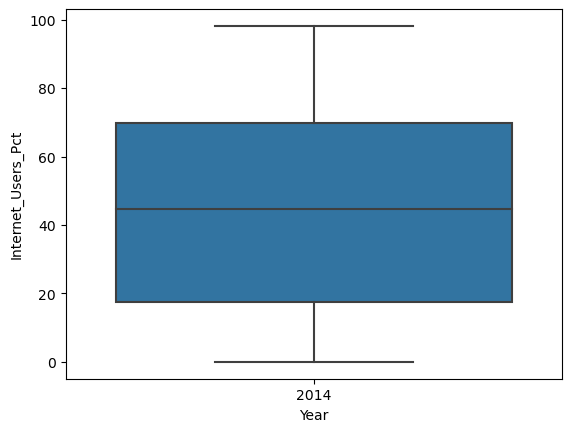

In [111]:
sns.boxplot(x=int_2014['Year'], y=int_2014['Internet_Users_Pct'])

<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

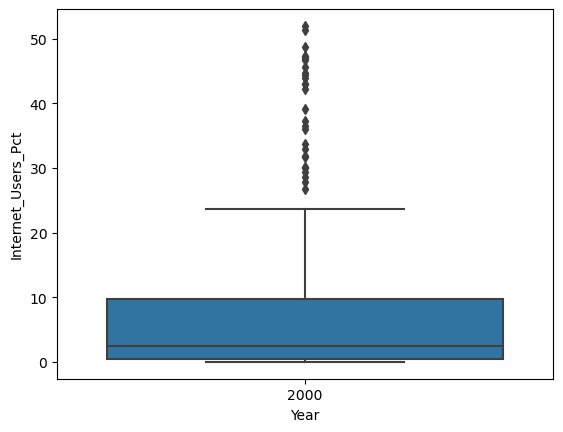

In [112]:
#sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )
sns.boxplot(x=int_2000['Year'], y=int_2000['Internet_Users_Pct'])


## Q18 answer: in 2000, Q1 was 0.4%, in 2014 it was 17%. In 2000, Q2 was 2.5%; in 2014 it was 44%. In 2000, Q3 was 9.7%; in 2014 it was 69.9%.

## Q19: For how many countries was the percentage of internet users below 5% in 2014?

In [61]:
int_2014[int_2014["Internet_Users_Pct"] < 5.0].count()

Country               16
Year                  16
Internet_Users_Pct    16
dtype: int64

## Q19 answer: 16 countries

## Q20: Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.


In [62]:
gdp_df.head(20)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
5,Afghanistan,2016,2101.422187
6,Afghanistan,2015,2108.714173
7,Afghanistan,2014,2144.449634
8,Afghanistan,2013,2165.340915
9,Afghanistan,2012,2122.830759


In [63]:
internet_dfnew.head(20)


,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
5,Afghanistan,2009,3.550000
6,Afghanistan,2008,1.840000
7,Afghanistan,2007,1.900000
8,Afghanistan,2006,2.107124
9,Afghanistan,2005,1.224148


In [64]:
#merging GDP and Internet data frames with an outer join on Country & Year columns
gdp_and_internet_use = gdp_df.merge(internet_dfnew, how='outer', on=('Country', 'Year'))

In [80]:
gdp_and_internet_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             8736 non-null   object 
 1   Year                8736 non-null   int64  
 2   GDP_Per_Capita      7662 non-null   float64
 3   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 273.1+ KB


In [66]:
gdp_and_internet_use.tail(30)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
8706,Virgin Islands (U.S.),2002,NaN,27.494432
8707,Virgin Islands (U.S.),2001,NaN,18.375766
8708,Virgin Islands (U.S.),2000,NaN,13.815081
8709,Virgin Islands (U.S.),1999,NaN,11.074606
8710,Virgin Islands (U.S.),1998,NaN,9.245220
8711,Virgin Islands (U.S.),1997,NaN,6.948369
8712,Virgin Islands (U.S.),1996,NaN,4.647186
8713,Virgin Islands (U.S.),1995,NaN,2.801958
8714,Virgin Islands (U.S.),1994,NaN,0.940645
8715,Virgin Islands (U.S.),1990,NaN,0.000000


## answer: see above

## Q21: Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?
## Q22: Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

In [67]:
#creating a new dataframe for just 2014 data
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"] == 2014]

In [68]:
gdp_and_internet_use_2014.sort_values('Internet_Users_Pct', ascending = False)
#answer: Iceland, Bermuda, Norway

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2993,Iceland,2014,50450.741612,98.16
687,Bermuda,2014,77361.104881,96.80
5212,Norway,2014,62838.515727,96.30
1669,Denmark,2014,52048.335493,95.99
7665,Andorra,2014,NaN,95.90
...,...,...,...,...
7167,Turks and Caicos Islands,2014,24661.145053,NaN
7179,Tuvalu,2014,3521.328676,NaN
7377,Upper middle income,2014,14063.487284,NaN
7542,West Bank and Gaza,2014,5967.073437,NaN


In [69]:
#creating a new dataframe for just the 3 countries above to show GDP over time
high_int_14 = gdp_df[ (gdp_df['Country'] == 'Iceland') | (gdp_df['Country'] == 'Bermuda') | (gdp_df['Country'] == 'Norway')]
high_int_14.head(20)

,Country,Year,GDP_Per_Capita
679,Bermuda,2022,81165.650944
680,Bermuda,2021,78570.489515
681,Bermuda,2020,76117.804744
682,Bermuda,2019,81681.726668
683,Bermuda,2018,81423.408453
684,Bermuda,2017,81834.955874
685,Bermuda,2016,78149.352535
686,Bermuda,2015,77842.753903
687,Bermuda,2014,77361.104881
688,Bermuda,2013,80503.650291


C:\Users\emily\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


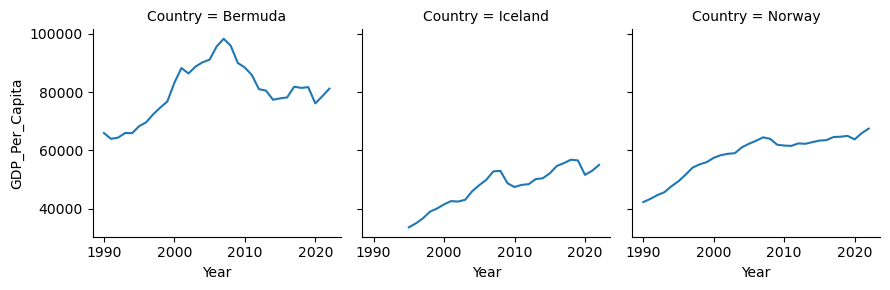

In [113]:
#creating FacetGrid

graph = sns.FacetGrid(high_int_14, col = 'Country')
graph.map(sns.lineplot, "Year", "GDP_Per_Capita" )


## Q21/22 answer: Bermuda has had the highest GDP overall, they peaked around 2008 and then drastically declined; all countries had declines after 2008 & 2020; Iceland and Norway are gradually rising

## Q23: Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

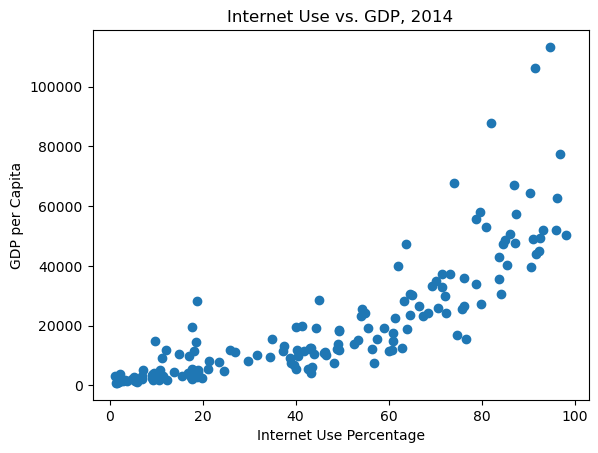

In [84]:
plt.scatter(gdp_and_internet_use_2014.Internet_Users_Pct, gdp_and_internet_use_2014.GDP_Per_Capita)
plt.xlabel('Internet Use Percentage')
plt.ylabel('GDP per Capita')
plt.title('Internet Use vs. GDP, 2014')
plt.show()

In [83]:
#investigating outliers:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['GDP_Per_Capita'] >= 100000]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
4154,Luxembourg,2014,113313.578898,94.67,High
4187,"Macao SAR, China",2014,151616.402364,NaN,High
5752,Qatar,2014,106141.326189,91.49,High


## Q23 answer: as internet use goes up, GDP goes up as well. Luxembourg and Qatar are the 2 dots at the extreme upper right of the plot - have the highest GDPs and high internet use as well.

In [73]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7,Afghanistan,2014,2144.449634,6.39
28,Africa Eastern and Southern,2014,3642.875373,NaN
61,Africa Western and Central,2014,4146.994622,NaN
94,Albania,2014,11586.817446,60.10
127,Algeria,2014,11561.259795,18.09


## Q24: Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [74]:
#gdp_per_capita_2014 

In [75]:
#use qcut to divide into 3 groups
pd.qcut(gdp_and_internet_use_2014.GDP_Per_Capita, q=3)


7         (765.259, 7099.217]
28        (765.259, 7099.217]
61        (765.259, 7099.217]
94      (7099.217, 19769.859]
127     (7099.217, 19769.859]
                ...          
8589                      NaN
8647                      NaN
8670                      NaN
8694                      NaN
8716                      NaN
Name: GDP_Per_Capita, Length: 281, dtype: category
Categories (3, interval[float64, right]): [(765.259, 7099.217] < (7099.217, 19769.859] < (19769.859, 151616.402]]

In [86]:
gdp_and_internet_use_2014.loc[:, 'GDP_group'] = pd.qcut(gdp_and_internet_use_2014.GDP_Per_Capita, q=3, labels = ['Low', 'Medium', 'High'])
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
7,Afghanistan,2014,2144.449634,6.39,Low
28,Africa Eastern and Southern,2014,3642.875373,NaN,Low
61,Africa Western and Central,2014,4146.994622,NaN,Low
94,Albania,2014,11586.817446,60.10,Medium
127,Algeria,2014,11561.259795,18.09,Medium
...,...,...,...,...,...
8589,T.F.Y.R. Macedonia,2014,NaN,68.06,NaN
8647,Turkey,2014,NaN,51.04,NaN
8670,Venezuela,2014,NaN,57.00,NaN
8694,Virgin Islands (U.S.),2014,NaN,50.07,NaN


## Q24 answer: see above

## Q25: Stretch Question: How does the median internet users percentage compare for the three gdp groups?

In [88]:
gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median().reset_index()

,GDP_group,Internet_Users_Pct
0,Low,10.6
1,Medium,43.4
2,High,78.7


## Q25 answer: see above